In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fer2013_dataset_file_path = 'drive/My Drive/Colab Notebooks/face_emotions/fer2013.csv'

In [ ]:
import csv
import numpy as np

In [ ]:
train_images, train_labels = [], []
val_images, val_labels = [], []
test_images, test_labels = [], []

with open(fer2013_dataset_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row_id,row in enumerate(csv_reader):
        if row_id == 0:
            continue

        label_index = row[0]
        image_data = row[1]
        split = row[2]

        #make label vector
        label = np.zeros(7)
        label [int(label_index)] = 1

        #make image vector
        image = list(map(int, image_data.split(' ')))

        if split == 'Training':
            train_labels.append(label)
            train_images.append(image)
        elif split == 'PublicTest':
            test_labels.append(label)
            test_images.append(image)
        elif split == 'PrivateTest':
            val_labels.append(label)
            val_images.append(image)

In [ ]:
train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)

In [ ]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

Label array: [0. 0. 0. 0. 0. 1. 0.] ₩nLabel: 5 ₩nEmotion: Surprise ₩nImage shape: (48, 48, 1)


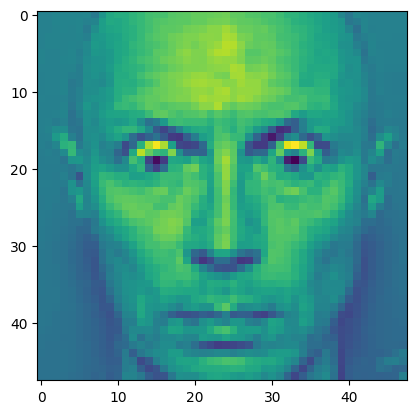

In [ ]:
index = 15
print('Label array:', train_labels[index],
      '₩nLabel:', np.argmax(train_labels[index]),
      '₩nEmotion:',emotions[np.argmax(train_labels[index])],
      '₩nImage shape:', train_images[index].shape)

plt.imshow(train_images[index].reshape(48,48))
plt.show()

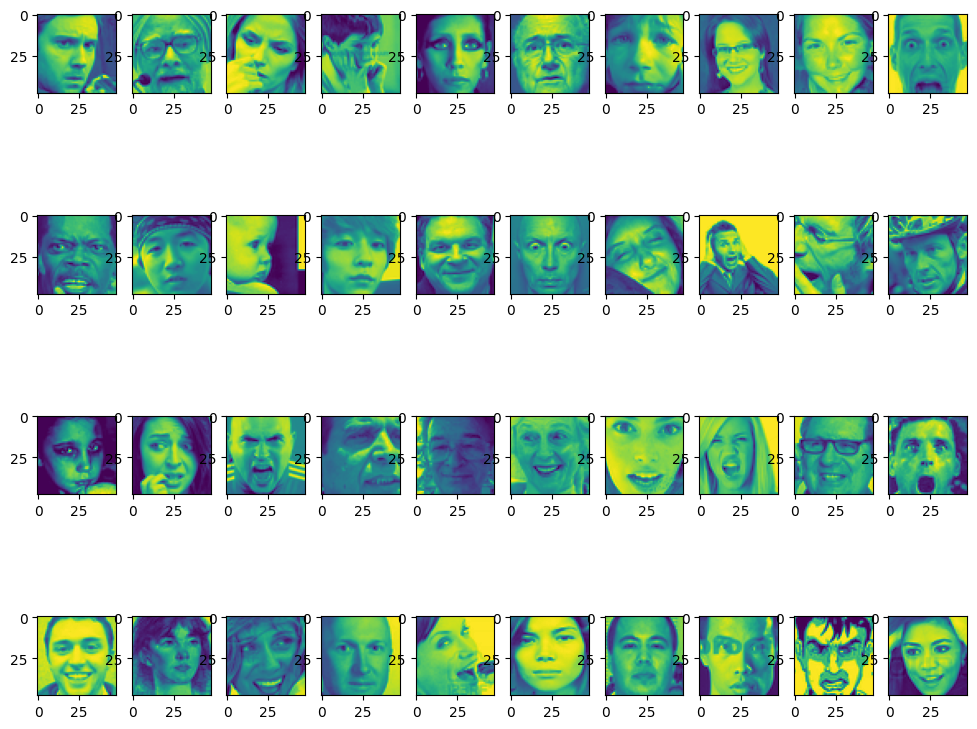

In [ ]:
# preview some images

plt.figure(figsize=(12, 10))
x, y = 10, 4

for i in range(40):
    plt.subplot(y, x, i + 1)
    plt.imshow(train_images[i].reshape((48, 48)))
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_shape = (48, 48, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(7,activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dropout (Dropout)           (None, 6400)              0

In [ ]:
image_input_shape = (48, 48, 1)

model = keras.models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=image_input_shape))
model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 128)      

In [ ]:
batch_size = 512
epochs = 10

#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    verbose=1)

Epoch 1/10
57/57 [==============================] - 46s 415ms/step - loss: 2.3784 - accuracy: 0.1839 - val_loss: 2.0516 - val_accuracy: 0.1560
Epoch 2/10
57/57 [==============================] - 22s 385ms/step - loss: 1.9103 - accuracy: 0.2084 - val_loss: 1.8797 - val_accuracy: 0.2444
Epoch 3/10
57/57 [==============================] - 22s 391ms/step - loss: 1.8701 - accuracy: 0.2255 - val_loss: 1.8414 - val_accuracy: 0.2449
Epoch 4/10
57/57 [==============================] - 23s 407ms/step - loss: 1.8467 - accuracy: 0.2328 - val_loss: 1.8221 - val_accuracy: 0.2449
Epoch 5/10
57/57 [==============================] - 22s 394ms/step - loss: 1.8324 - accuracy: 0.2432 - val_loss: 1.8163 - val_accuracy: 0.2449
Epoch 6/10
57/57 [==============================] - 22s 392ms/step - loss: 1.8188 - accuracy: 0.2463 - val_loss: 1.8006 - val_accuracy: 0.2449
Epoch 7/10
57/57 [==============================] - 22s 393ms/step - loss: 1.8069 - accuracy: 0.2513 - val_loss: 1.7572 - val_accuracy: 0.2806

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


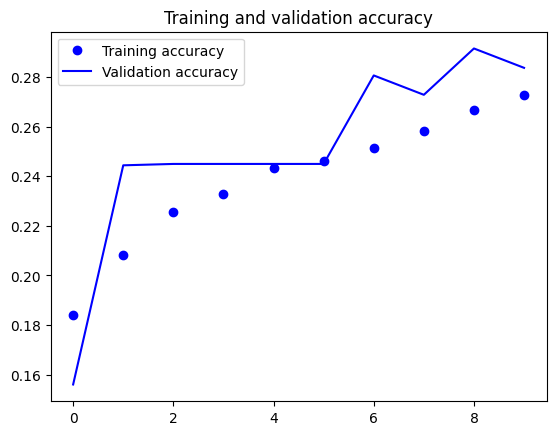

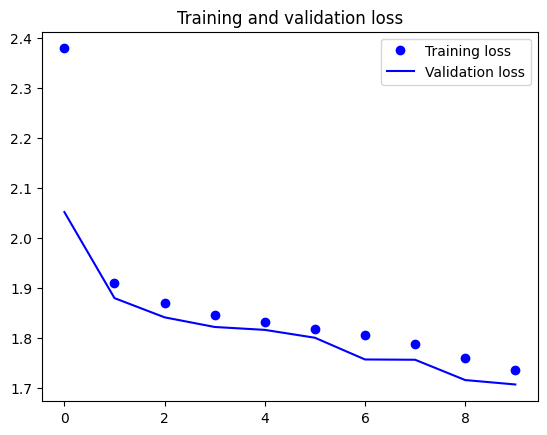

In [ ]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

113/113 [==============================] - 1s 10ms/step - loss: 1.6952 - accuracy: 0.2942
Loss: 1.6952240467071533 
Accuracy: 29.423236846923828 %


Image shape: (48, 48, 1)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (7,) 
True Image Label: Angry


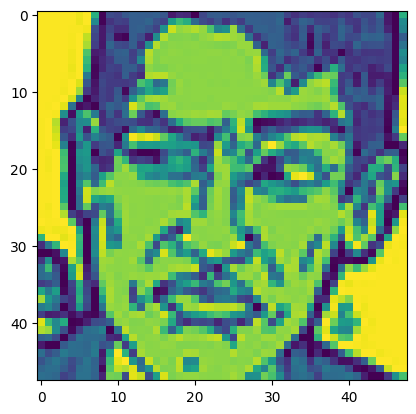

1/1 [==============================] - 1s 598ms/step
Predicted Image Label Array: ['0.16', '0.03', '0.15', '0.21', '0.18', '0.10', '0.17'] 
Predicted Image Label Shape: (1, 7) 
Predicted Image Label: Happy


In [ ]:
img_id = 0

sample_test_image = test_images[img_id]
sample_test_label = test_labels[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', emotions[np.argmax(sample_test_label)])
plt.imshow(sample_test_image.reshape(48, 48))
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 48, 48, 1))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', emotions[np.argmax(prediction)])